In [1]:
#import libraries
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt
from collections import Counter
from plotly.offline import iplot

In [2]:
#read data and review data
data = pd.read_csv('netflix_titles.csv')
data.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
data.shape

(8807, 12)

- data set have 8807 rows and 12 columns

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


  6 columns have missing values
  - 'director' has 2634 null values
  - 'cast' has 825 null values
  - 'country' has 831 null values
  - 'date_added' has 10 null values
  - 'rating' has 4 null values
  - 'duration' has 3 null values

In [5]:
#cleanning data 
data.dropna(inplace= True)

drop_col = ['show_id', 'listed_in', 'description']
data.drop(drop_col, axis = 1, inplace = True)

data.shape

(5332, 9)

In [6]:
data = data.reset_index(drop=True)
data.head(5)

,type,title,director,cast,country,date_added,release_year,rating,duration
0,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min
1,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons
2,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min
3,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min
4,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,"September 21, 2021",1998,TV-14,166 min


In [7]:
#visualization
col = 'type'
group = data[col].value_counts().reset_index()
group = group.rename(columns = {col : 'count', 'index' : col})

#pie plot ratio of movies and tv shows
trace = go.Pie(labels=group[col], values=group['count'], pull=[0.05, 0], marker=dict(colors=["#00A8E1", "#232F3E"]))
layout = go.Layout(title="RATIO OF MOVIE AND TV SHOWS", height=400, legend=dict(x=0.1, y=1.1))
fig = go.Figure(data = [trace], layout = layout)
iplot(fig)

Unsupported

In [8]:
#top 10 countries
countries = Counter(data.country)
top_countries = countries.most_common(10)
tc = px.bar(x = [i[0] for i in top_countries],y = [i[1] for i in top_countries],color=[i[0] for i in top_countries])
tc.update_layout(title = 'TOP 10 COUNTRIES',xaxis_title = 'COUNTRIES',yaxis_title = 'Count')

Unsupported

In [9]:
#most frequency of release year
year = Counter(data.release_year)
top_years = year.most_common(10)
t_year = px.bar(x = [i[0] for i in top_years],y = [i[1] for i in top_years],color=[i[0] for i in top_years],width = 1000)
t_year.update_layout(title = 'MOST FREQUENCY OF RELEASE YEAR',xaxis_title = 'Years',yaxis_title = 'Count')

Unsupported

In [10]:
#top ratings
tr = Counter(data.rating)
top_rate = tr.most_common(10)
top_rating = px.bar(x = [i[1] for i in top_rate],y = [i[0] for i in top_rate], color=[i[0] for i in top_rate],width = 1000)
top_rating.update_layout(title = 'TOP 10 RATINGS',xaxis_title = 'Count',yaxis_title = 'Rating')

Unsupported

In [11]:
#top directors
directors = Counter(data.director)
top_directors = directors.most_common(10)
td = px.bar(x = [i[1] for i in top_directors],y = [i[0] for i in top_directors],color=[i[0] for i in top_directors])
td.update_layout(title = 'TOP DIRECTORS',xaxis_title = 'No. of Shows/Movies',yaxis_title = 'Directors')

Unsupported

In [12]:
#top cast
cast = Counter(data.cast)
topcasts = cast.most_common(10)
tcast = px.bar(x = [i[1] for i in topcasts],y = [i[0] for i in topcasts],color=[i[0] for i in topcasts])
tcast.update_layout(title = 'TOP CASTS',xaxis_title = 'Count',yaxis_title = 'Name of Cast')

Unsupported

In [13]:
#top 10 duration of movies 
movies = data.type == 'Movie'
md = Counter(data[movies].duration)
topmd = md.most_common(10)
mdt = px.bar(x = [i[0] for i in topmd],y = [i[1] for i in topmd],color=[i[0] for i in topmd],width = 1000)
mdt.update_layout(title = 'TOP 10 DURATION OF MOVIES ',xaxis_title = 'Duration',yaxis_title = 'Count')

Unsupported

In [14]:
#total season of TV Shows
shows = data.type == 'TV Show'
sd = Counter(data[shows].duration)
topsd = sd.most_common(15)
sdt = px.bar(x = [i[0] for i in topsd],y = [i[1] for i in topsd],color=[i[0] for i in topsd],width = 1000)
sdt.update_layout(title = 'TOTAL SEASONS TV SHOWS', xaxis_title = 'Seasons',yaxis_title = 'Count')

Unsupported

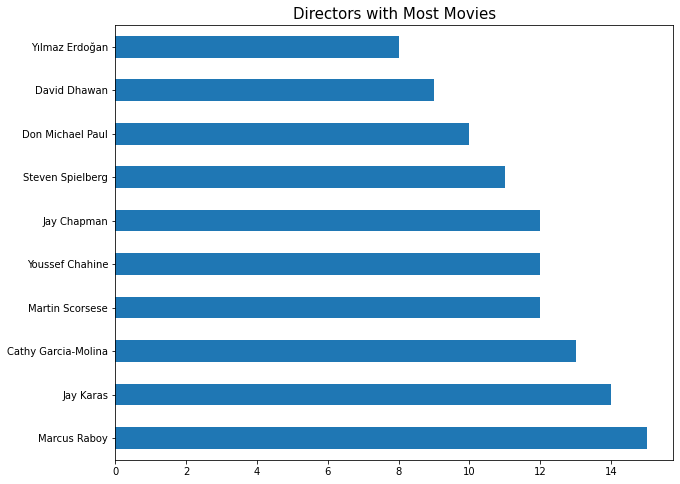

In [25]:
plt.figure(figsize=(10,8))
# Drop 'No Data' row
df2 = data["director"].value_counts().head(11)
df2.tail(10).plot(kind='barh')
plt.title("Directors with Most Movies", size=15)
plt.show()